## Load Data

In [1]:
import json
import os

folder_name = "../python/assets/cell_types/gpt_4o"
files = os.listdir(folder_name)
print(f"length of files: {len(files)}")

no_empty_files = []
empty_files = []
for file in files:
   with open(os.path.join(folder_name, file), "r") as f:
      data = json.load(f)
   if len(data) > 0:
      no_empty_files.append(file)
   else:
      empty_files.append(file)

print(f"length of no_empty_files): {len(no_empty_files)}")

length of files: 1301
length of no_empty_files): 1298


In [2]:
with open("../assets/downsampled_pmids.txt", "r") as f:
   pmids = f.readlines()

pmids = [pmid.strip() for pmid in pmids]
no_empty_files = [pid.split(".")[0] for pid in no_empty_files]
empty_files = [pid for pid in pmids if pid not in no_empty_files]
print(len(empty_files))

995


In [48]:
empty_files

['35471902',
 '35981526',
 '33159087',
 '35105876',
 '36922600',
 '39843423',
 '39553973',
 '30401872',
 '34047275',
 '26972323',
 '39554067',
 '33723258',
 '39974884',
 '39651270',
 '39005382',
 '23055826',
 '28898631',
 '33275100',
 '32994345',
 '22398551',
 '31612861',
 '25139958',
 '26140589',
 '39888881',
 '38456840',
 '26241137',
 '28081755',
 '21549951',
 '35867663',
 '23326643',
 '33635271',
 '22720681',
 '34375595',
 '25139957',
 '33860762',
 '25375200',
 '27842640',
 '31063134',
 '30790533',
 '26080004',
 '29943732',
 '25537193',
 '20434992',
 '31112128',
 '25033173',
 '24507184',
 '24937284',
 '35858366',
 '24355782',
 '23972590',
 '33030427',
 '28441561',
 '26406362',
 '34696825',
 '24156814',
 '21172604',
 '21817013',
 '25654249',
 '22116028',
 '23200990',
 '31570569',
 '29444072',
 '35271315',
 '26293964',
 '21836017',
 '21694704',
 '25103406',
 '38979985',
 '30467170',
 '35618728',
 '29622651',
 '21654803',
 '34762476',
 '23430653',
 '23394833',
 '20471270',
 '34516839',

In [12]:
import sys
import os
import numpy as np

current_dir = os.getcwd()
drosophila_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(drosophila_dir)

from python.extraction.utils import Paper
pmid = '38456840'
paper = Paper.from_pmid(pmid)
print(paper.sections)

{'INTRO': ['Related research article Richter V, Rist A, Kislinger G, Laumann M, Schoofs A, Miroschnikow A, Pankratz M, Cardona A, Thum AS. 2024. Morphology and ultrastructure of external sense organs of Drosophila larvae. eLife 12:RP91155. doi: 10.7554/eLife.91155.', 'All animals are exposed to a changing environment. In order to adapt and survive, they need to gather information about their surroundings and choose how best to respond to each condition. For instance, the small larvae of the fruit fly Drosophila melangoster face several decisions as they crawl and dig through the decaying vegetable matter they inhabit: how much heat or fermented alcohol should they tolerate? Which chemical trace should they follow? And should they stay or escape if they sense something (which might be a predator) contact their body?', 'The larvae perceive the world around them through a complex array of external sense organs that each receive particular environmental cues, such as olfactory, gustatory, 

## Average length of files can't find cell types

In [3]:
def total_length(sections):
   length = 0
   for intro in sections["INTRO"]:
      length += len(intro)
   for rst in sections["RESULTS"]:
      length += len(rst)
   return length 

In [10]:
import sys
import os
import numpy as np

current_dir = os.getcwd()
drosophila_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(drosophila_dir)

from python.extraction.utils import Paper
no_lengths = []
for i, pmid in enumerate(empty_files):
   paper = Paper.from_pmid(pmid)
   length = total_length(paper.sections)
   if length < 5000:
      print(f"{pmid} : {length}")
   no_lengths.append(length)

print(f"Average length of files can't find cell types: {np.mean(no_lengths)}")

35471902 : 864
35981526 : 456
33159087 : 354
35105876 : 377
36922600 : 403
39843423 : 540
39553973 : 0
30401872 : 463
34047275 : 766
26972323 : 578
39554067 : 0
33723258 : 410
39974884 : 0
39651270 : 0
39005382 : 0
23055826 : 2723
28898631 : 515
33275100 : 4968
32994345 : 3177
31612861 : 4217
38456840 : 4938
26241137 : 4088
27842640 : 4764
21694704 : 4572
29414938 : 4890
39358527 : 2221
Average length of files can't find cell types: 21536.72663316583


In [16]:
pmids = ['35471902', '35981526', '33159087', '35105876', '36922600', '39843423', '39553973', '30401872', '34047275', '26972323', '39554067', '33723258', '39974884', '39651270', '39005382', '23055826', '28898631', '33275100', '32994345', '31612861', '38456840', '26241137', '27842640', '21694704', '29414938', '39358527']

In [17]:
print(pmids)

['35471902', '35981526', '33159087', '35105876', '36922600', '39843423', '39553973', '30401872', '34047275', '26972323', '39554067', '33723258', '39974884', '39651270', '39005382', '23055826', '28898631', '33275100', '32994345', '31612861', '38456840', '26241137', '27842640', '21694704', '29414938', '39358527']


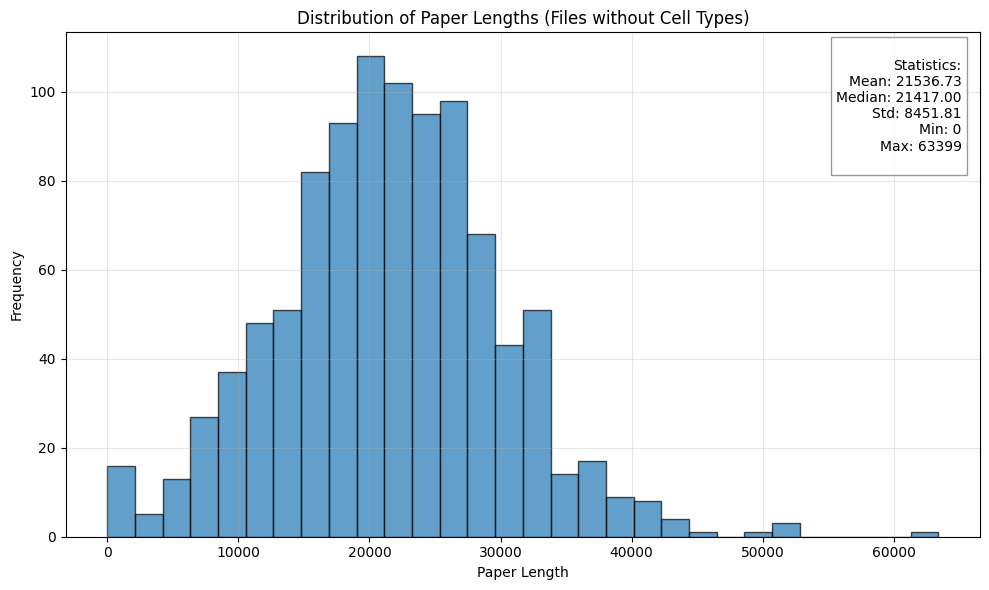

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(no_lengths, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Paper Lengths (Files without Cell Types)')
plt.xlabel('Paper Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

stats_text = f"""
Statistics:
Mean: {np.mean(no_lengths):.2f}
Median: {np.median(no_lengths):.2f}
Std: {np.std(no_lengths):.2f}
Min: {min(no_lengths)}
Max: {max(no_lengths)}
"""
plt.text(0.98, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

## Average length of files can find cell types

In [6]:
import sys
import os
import numpy as np

current_dir = os.getcwd()
drosophila_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(drosophila_dir)

from python.extraction.utils import Paper
lengths = []
for i, pmid in enumerate(no_empty_files):
   paper = Paper.from_pmid(pmid)
   length = total_length(paper.sections)
   lengths.append(length)

print(f"Average length of files can find cell types: {np.mean(lengths)}")
   

Average length of files can find cell types: 23213.457627118645


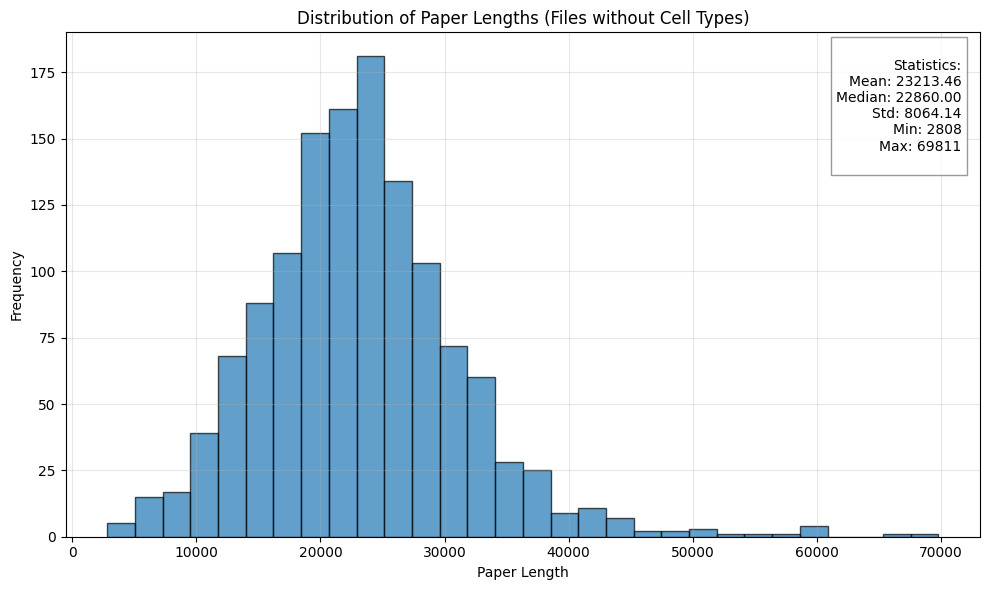

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 创建直方图
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Paper Lengths (Files without Cell Types)')
plt.xlabel('Paper Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# 添加统计信息
stats_text = f"""
Statistics:
Mean: {np.mean(lengths):.2f}
Median: {np.median(lengths):.2f}
Std: {np.std(lengths):.2f}
Min: {min(lengths)}
Max: {max(lengths)}
"""
plt.text(0.98, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

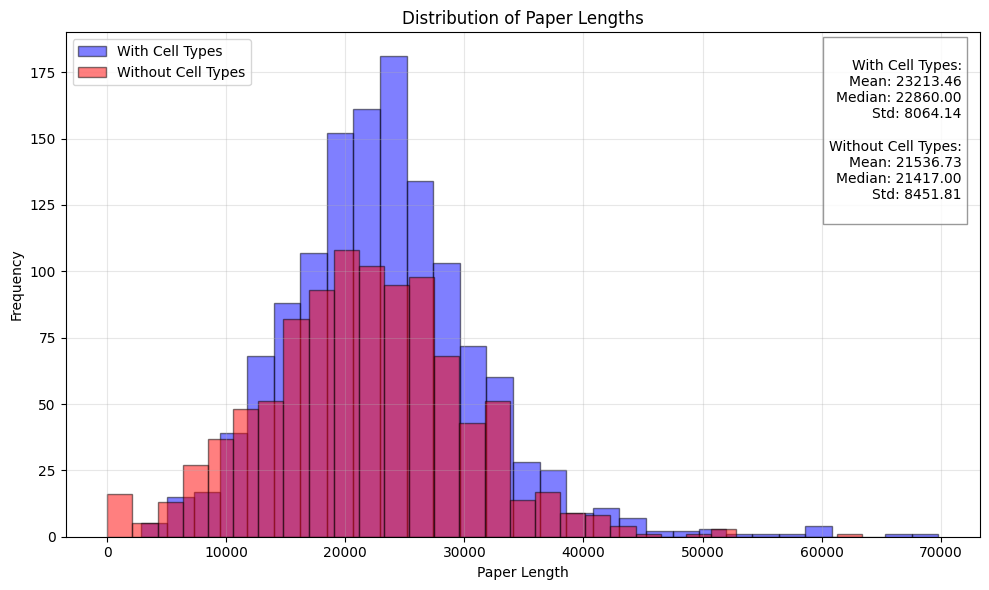

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

plt.hist(lengths, bins=30, edgecolor='black', alpha=0.5, label='With Cell Types', color='blue')
plt.hist(no_lengths, bins=30, edgecolor='black', alpha=0.5, label='Without Cell Types', color='red')

plt.title('Distribution of Paper Lengths')
plt.xlabel('Paper Length')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()  


stats_text = f"""
With Cell Types:
Mean: {np.mean(lengths):.2f}
Median: {np.median(lengths):.2f}
Std: {np.std(lengths):.2f}

Without Cell Types:
Mean: {np.mean(no_lengths):.2f}
Median: {np.median(no_lengths):.2f}
Std: {np.std(no_lengths):.2f}
"""
plt.text(0.98, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

## Analysis of Distribution of detection of cell types

In [2]:
folder_name = "../python/assets/cell_types/gpt_4o"

rst = {}
for file in no_empty_files:
   with open(os.path.join(folder_name, file), "r") as f:
      data = json.load(f)
   rst[file] = len(data)


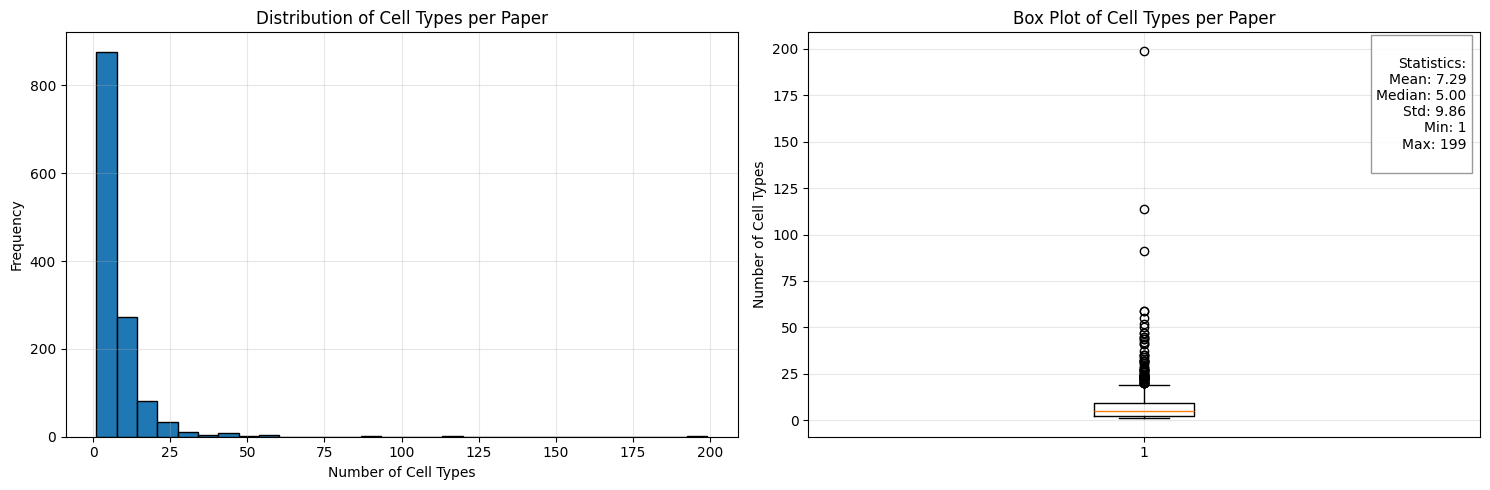

In [4]:
import matplotlib.pyplot as plt
import numpy as np


values = list(rst.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(values, bins=30, edgecolor='black')
ax1.set_title('Distribution of Cell Types per Paper')
ax1.set_xlabel('Number of Cell Types')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

ax2.boxplot(values)
ax2.set_title('Box Plot of Cell Types per Paper')
ax2.set_ylabel('Number of Cell Types')
ax2.grid(True, alpha=0.3)

stats_text = f"""
Statistics:
Mean: {np.mean(values):.2f}
Median: {np.median(values):.2f}
Std: {np.std(values):.2f}
Min: {min(values)}
Max: {max(values)}
"""
plt.text(0.98, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()